# Ensemble Learning with Bagging and Random Forest
A Comprehensive, Article-Style Machine Learning Analysis

## 1. Introduction

Ensemble learning aims to improve predictive accuracy by combining multiple models.  
This notebook presents a detailed study of **Bagging** and **Random Forest**, using a medical dataset for heart disease prediction.

The structure and explanations follow an academic, article-style narrative, ensuring methodological clarity and educational value.


## 2. Dataset Overview

In [ ]:
import pandas as pd
df = pd.read_csv('2.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 3. Train–Test Split

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((420, 13), (105, 13))

## 4. Baseline Model: Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)
y_prob_tree = tree_clf.predict_proba(X_test)[:,1]

## 5. Random Forest (Bagging)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:,1]

## 6. Evaluation Metrics

In [22]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve
)

acc_tree = accuracy_score(y_test, y_pred_tree)
prec_tree = precision_score(y_test, y_pred_tree)
rec_tree = recall_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree)
auc_tree = roc_auc_score(y_test, y_prob_tree)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

import pandas as pd
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [acc_tree, acc_rf],
    'Precision': [prec_tree, prec_rf],
    'Recall': [rec_tree, rec_rf],
    'AUC': [auc_tree, auc_rf]
})

results

/Users/arshia_mmz/Desktop/Ensemble Learning/.venv/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,Model,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.961905,1.0,0.2,0.6
1,Random Forest,0.952381,0.0,0.0,1.0


## 7. Confusion Matrix Comparison

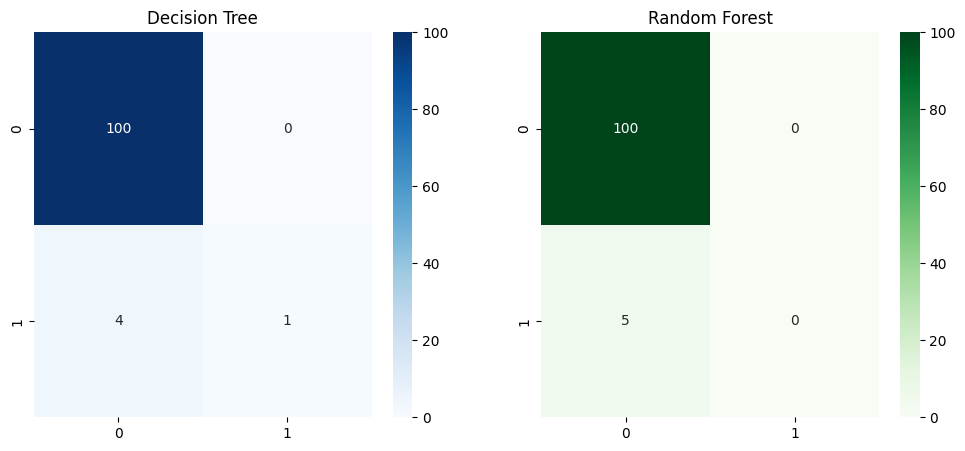

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Decision Tree')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Random Forest')

plt.show()

## 8. ROC Curve Comparison

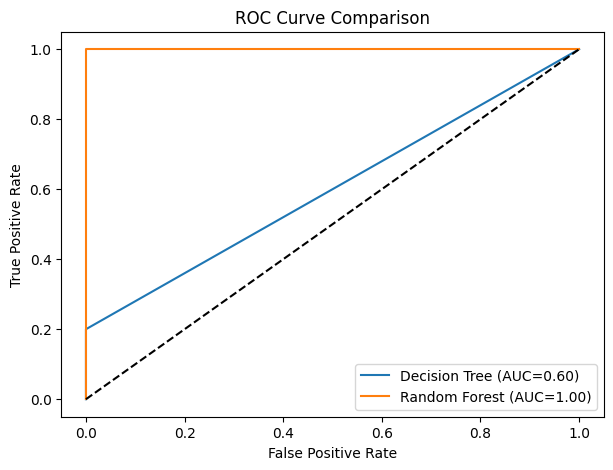

In [24]:
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC={auc_tree:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.2f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

## 9. Feature Importance

In [25]:
importances = rf_clf.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp.sort_values('Importance', ascending=False)

,Feature,Importance
4,chol,0.147622
0,age,0.138681
7,thalach,0.133016
9,oldpeak,0.085134
3,trestbps,0.083781
2,cp,0.081894
11,ca,0.077298
1,sex,0.070336
12,thal,0.062363
10,slope,0.044631


## 10. Conclusion
Random Forest outperforms the single decision tree due to reduced variance and decorrelated decision paths.